
# Working with diabetes dataset

**Things to be considered on project**

Predict the onset of diabetes based on diagnostic measures:

`Data_source:` 
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


Use ML algorithm to classify diabetes. Plot and display necessary metrics. 

Use EDA for feature selection and do necessary feature engineering and modeling and evaluation parts with explanation.

In [1]:
# Importing the necessary tools for EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_diabetes = pd.read_csv(".//data//diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### From the above analysis we can consider the following things.
* The dataset has total 768 rows & 9 columns.
* Null values are not present.
* All datas are in numeric form which machine models can understand.

In [5]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Checking for the null values.
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

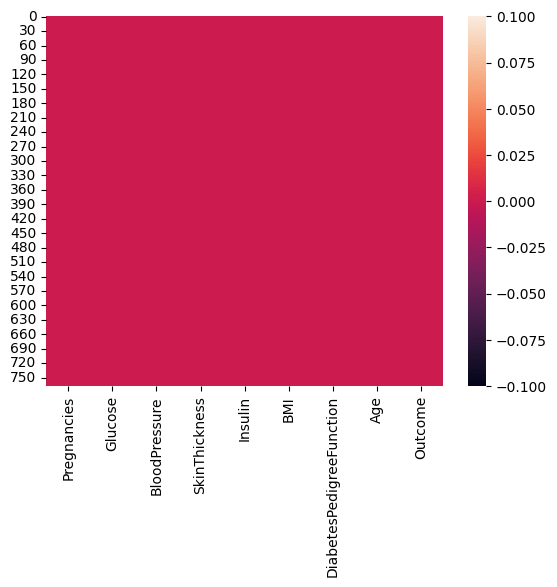

In [9]:
# Checking null values using seaborn heatmap.
# fig, ax = plt.subplots(figsize = (7, 5))

sns.heatmap(df_diabetes.isna())
plt.xticks(rotation=90);

# Data Visualization on different plots.

### Analyzing the data outcomes condition

In [11]:
df_diabetes.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

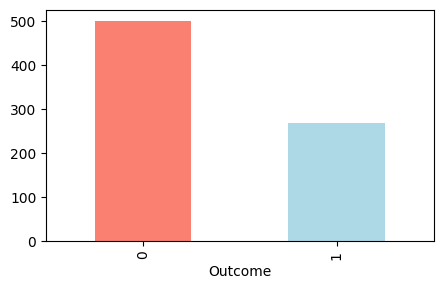

In [19]:
df_diabetes.Outcome.value_counts().plot(kind='bar', figsize=(5,3), color=["salmon", "lightblue"]);

### From the above plot we can say the data in not much balanced.
We have more datas having heart disease negative.

# Creating Histograms.

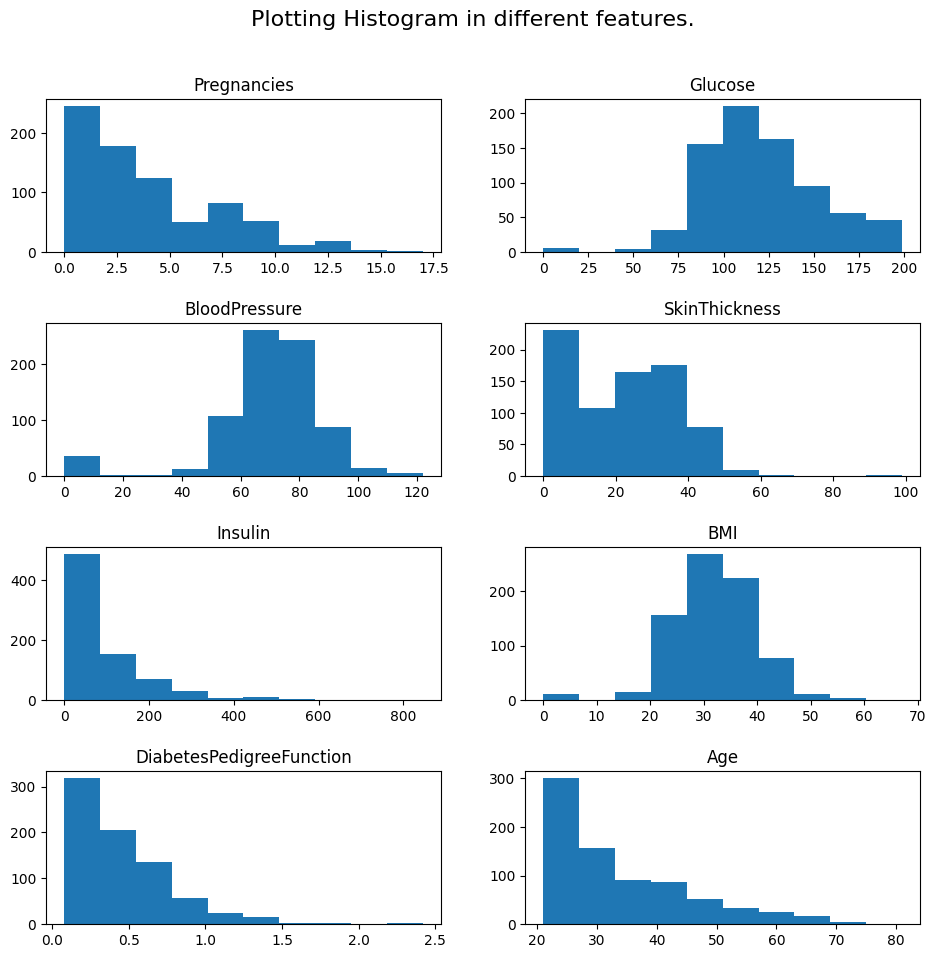

In [10]:
# Plotting on histogram

fig, ax = plt.subplots(4,2, figsize=(10,10))

# Main Title
fig.suptitle("Plotting Histogram in different features.", fontsize=16);
fig.tight_layout(pad=3.0)

# Adding value to first plot.
ax[0,0].hist(df_diabetes.Pregnancies);
ax[0,0].title.set_text("Pregnancies")

# Adding value to second plot.
ax[0,1].hist(df_diabetes.Glucose);
ax[0,1].title.set_text("Glucose")

# Adding value to third plot.
ax[1,0].hist(df_diabetes.BloodPressure);
ax[1,0].title.set_text("BloodPressure")

# Adding value to Fourth plot.
ax[1,1].hist(df_diabetes.SkinThickness);
ax[1,1].title.set_text("SkinThickness")

# Adding value to fifth plot.
ax[2,0].hist(df_diabetes.Insulin);
ax[2,0].title.set_text("Insulin")

# Adding value to sixth plot.
ax[2,1].hist(df_diabetes.BMI);
ax[2,1].title.set_text("BMI")

# Adding value to seventh plot.
ax[3,0].hist(df_diabetes.DiabetesPedigreeFunction);
ax[3,0].title.set_text("DiabetesPedigreeFunction")

# Adding value to eighth plot.
ax[3,1].hist(df_diabetes.Age);
ax[3,1].title.set_text("Age")



In [11]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Creating Histograms simple way.

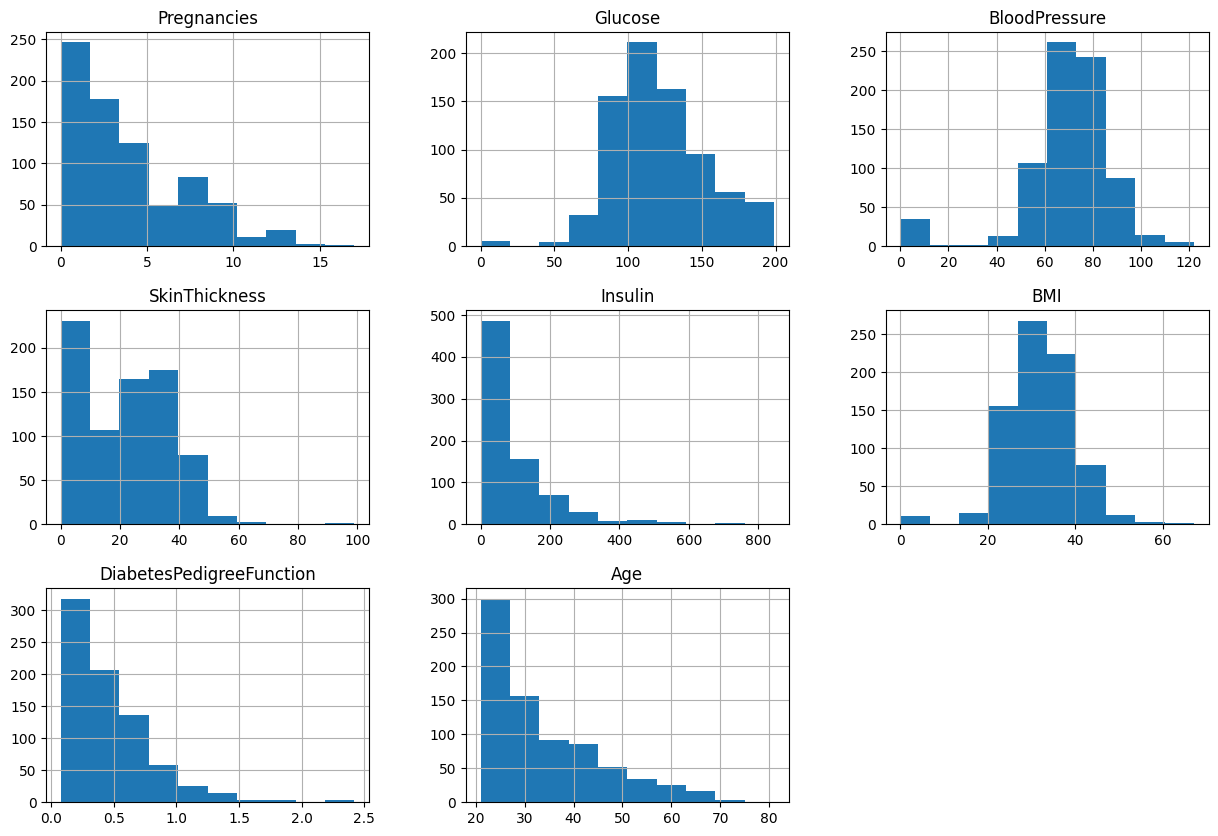

In [19]:
# plt_data = df_diabetes.iloc[:, :-1]
# plt_data.hist(figsize=(15,10));


df_diabetes.iloc[:, :-1].hist(figsize=(15, 10));

## Data visualization with Kdeplot.

In [15]:
def kdeplot(var):
    plt.figure(figsize = (5, 3))
    sns.kdeplot(data = df_diabetes, x = var, hue = "Outcome")

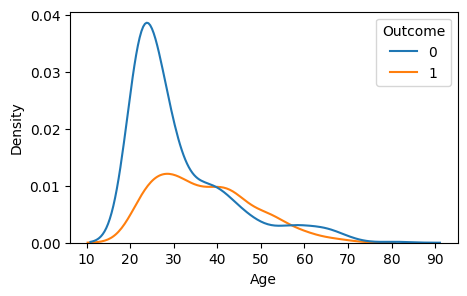

In [16]:
kdeplot("Age")

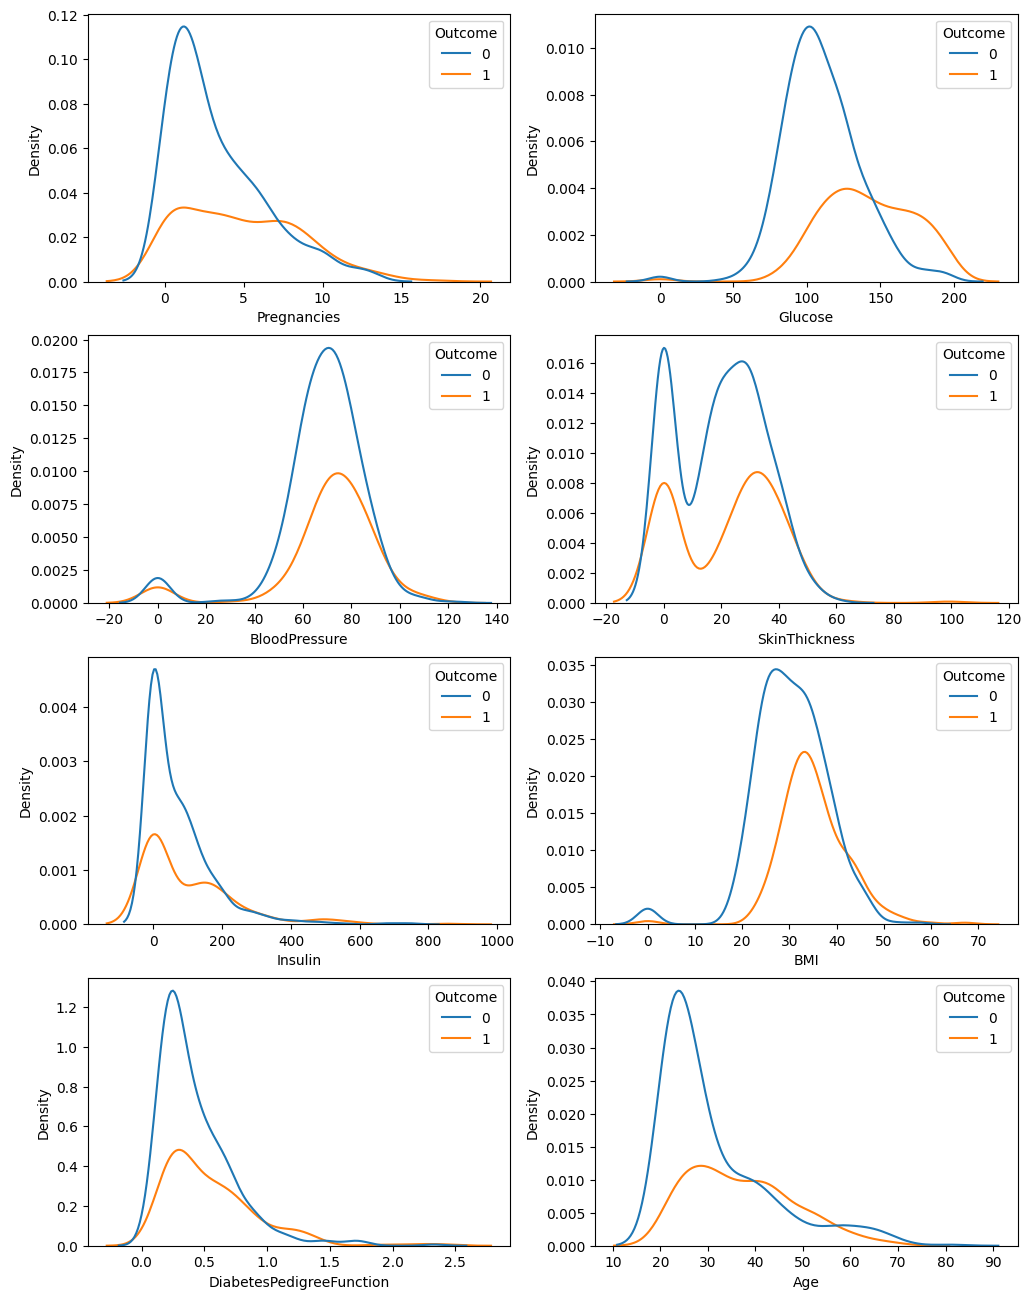

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

ax = axes.flatten()

for i, column in enumerate(df_diabetes.columns[:-1]):
    sns.kdeplot(data=df_diabetes, x=df_diabetes[column], ax=ax[i], hue="Outcome")

## Visualization with boxplot.
### Checking for outliers

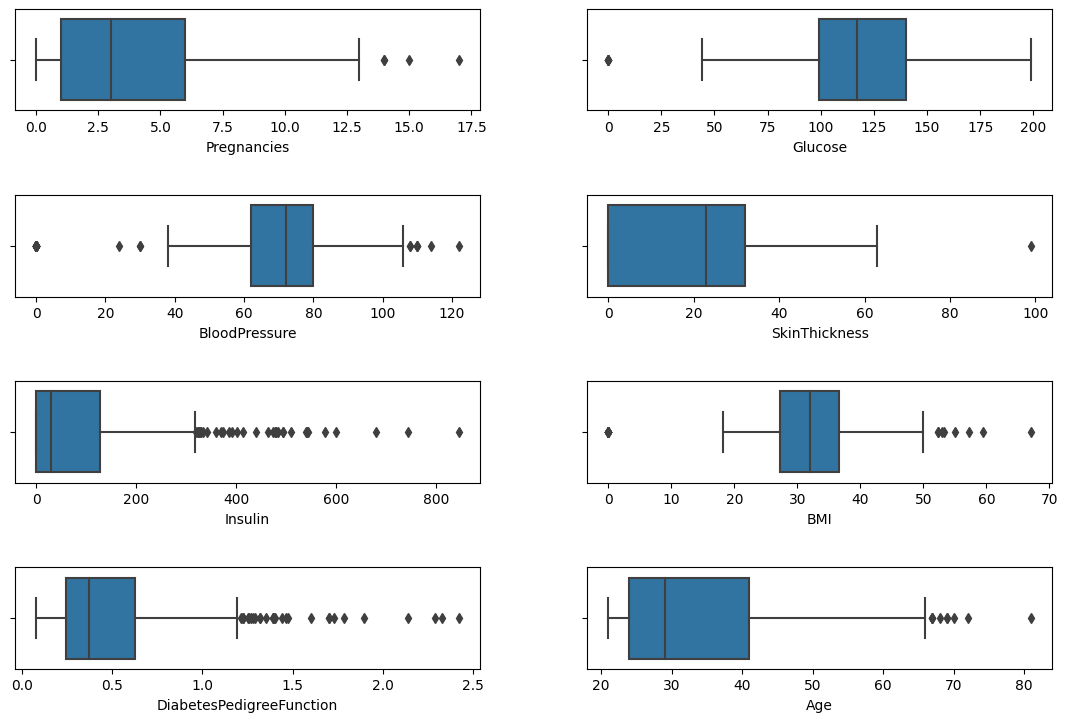

In [17]:
fig, axes = plt.subplots(4, 2, figsize=(12, 8))

fig.tight_layout(pad = 4.0)

ax = axes.flatten()

for i, column in enumerate(df_diabetes.columns[:-1]):
    sns.boxplot(data=df_diabetes, x=df_diabetes[column], ax=ax[i])


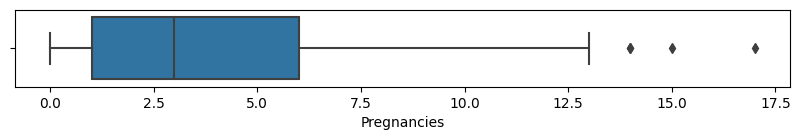

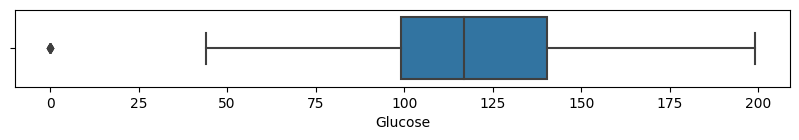

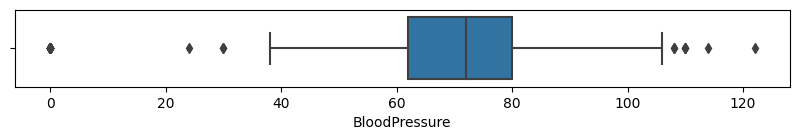

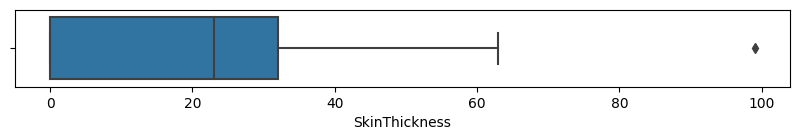

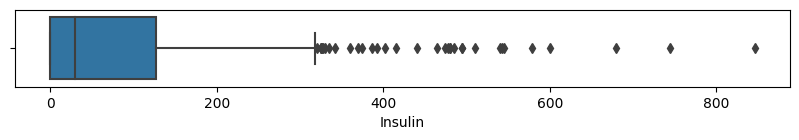

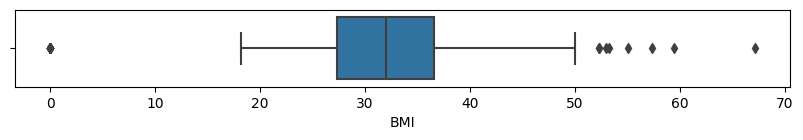

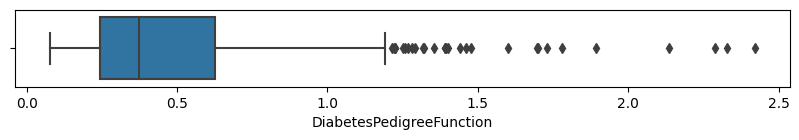

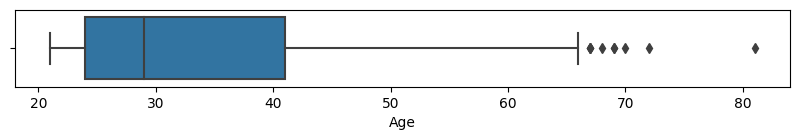

In [7]:
plt_data = df_diabetes.iloc[:, :-1]

for column in plt_data:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=plt_data, x=column)

# Finding correlation between features.

In [29]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

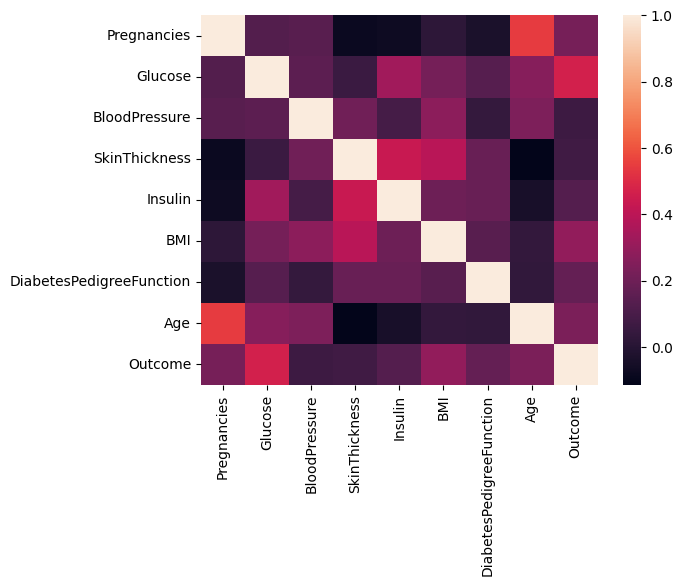

In [21]:
df_diabetes.corr()
sns.heatmap(df_diabetes.corr());

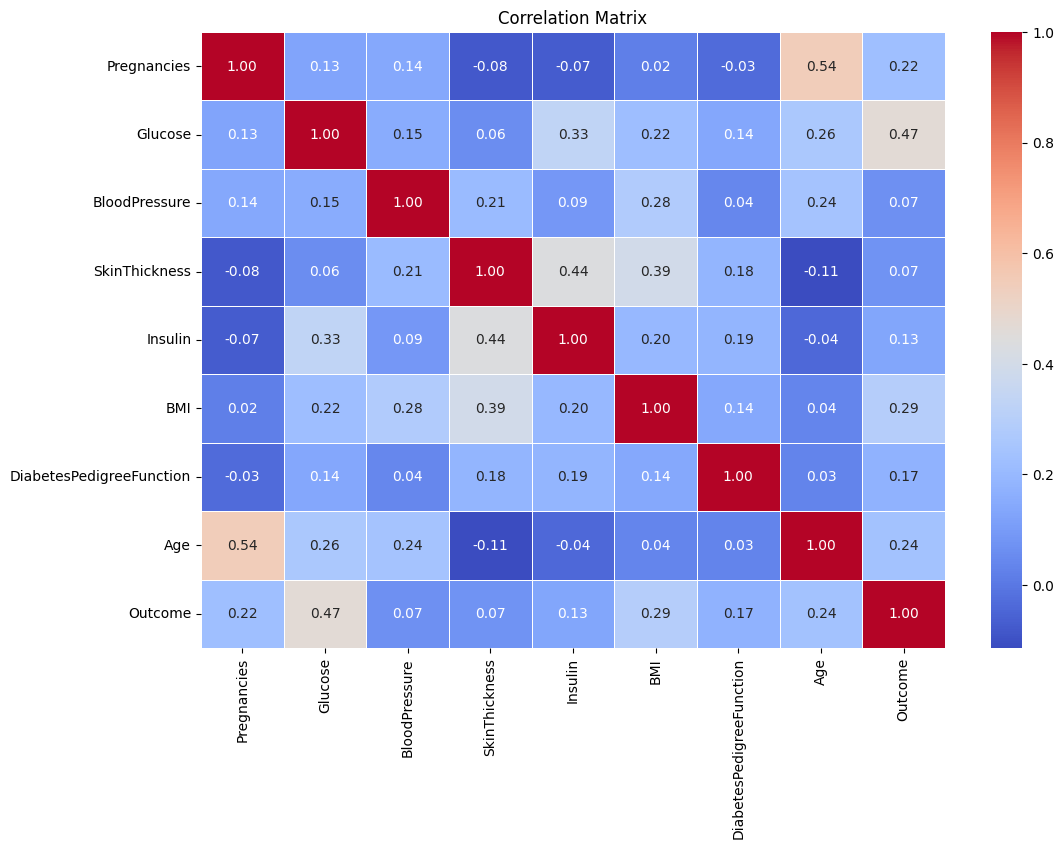

In [105]:
corr_matrix = df_diabetes.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5);
plt.title('Correlation Matrix')
plt.show(block=False)

### Insights from Heatmap.
* Pregnancies, Glucose, BMI & Age are the most important features in predicting heart disease.
* Pregnancies and Age has the greater relations amoung the different columns.

### From the above heatmap we are choosing the 4 different columns which have higher impact on disease.

In [43]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
# Choosing the features having greater correlation with outcome.
selected_features = ["Glucose", "BMI", "Age", "Pregnancies", "Outcome"]
df_diabetes[selected_features].head()

,Glucose,BMI,Age,Pregnancies,Outcome
0,148,33.6,50,6,1
1,85,26.6,31,1,0
2,183,23.3,32,8,1
3,89,28.1,21,1,0
4,137,43.1,33,0,1


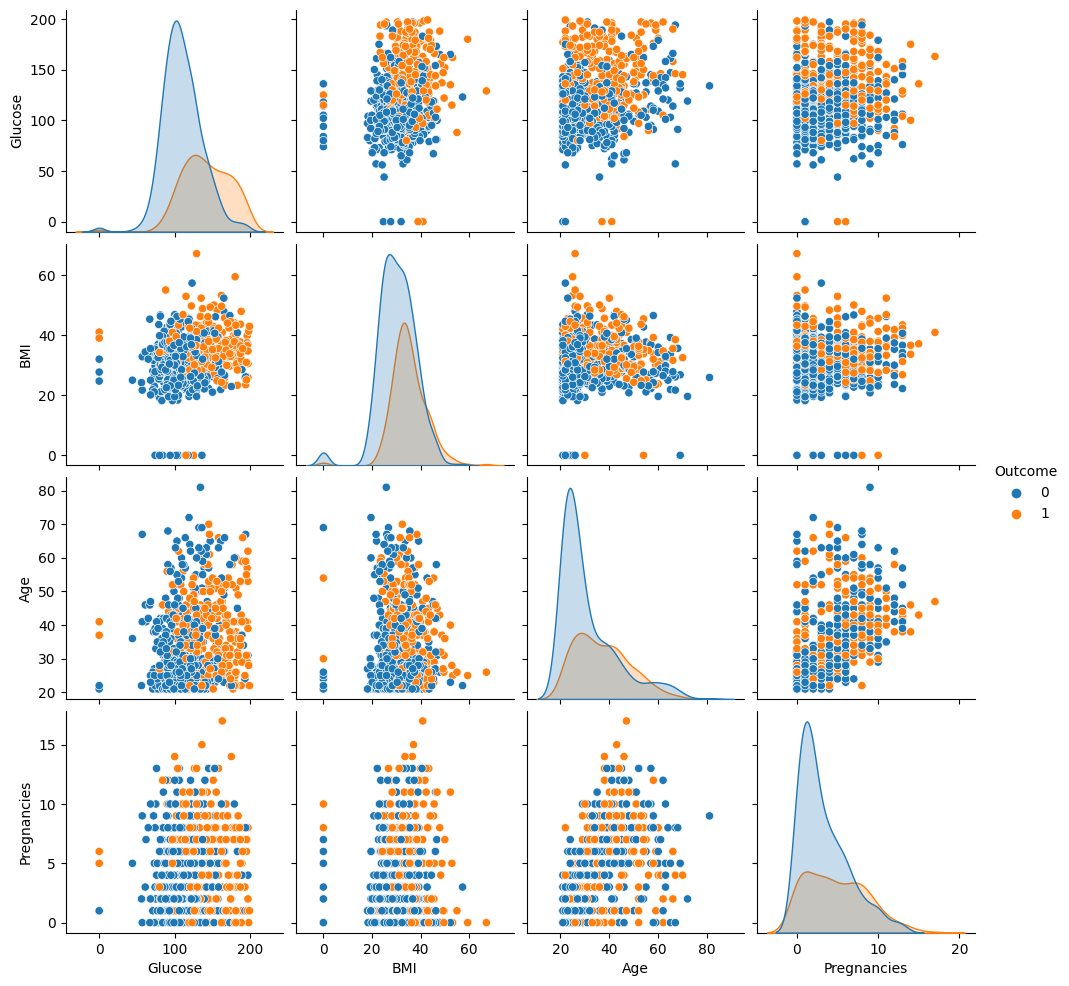

In [30]:
sns.pairplot(df_diabetes[selected_features], hue="Outcome");

## From the above pairplot we can say that BMI & Glucose can be a helpful feature in predicting outcome.

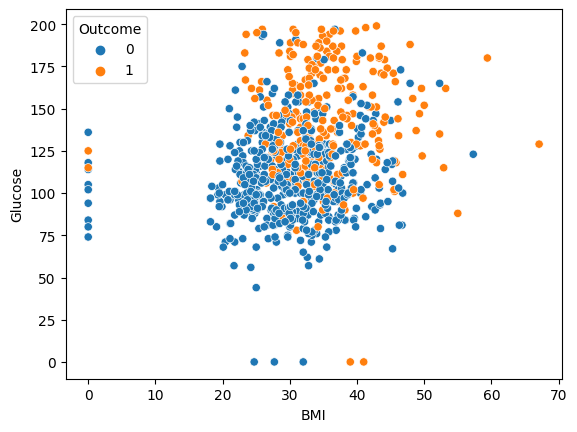

In [106]:
sns.scatterplot(data=df_diabetes, y="Glucose", x="BMI", hue="Outcome");

# Predictions with Machine Learning Models.

In [5]:
# Defining fuction for getting the accuracy score and confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

def use_model(model_name):
    # Set up random seed.
    np.random.seed(88)

    # Prepare data
    X = df_diabetes.iloc[:, :-1]
    y = df_diabetes['Outcome']

    # Data split into train and test sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit the model.
    model = model_name()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model.
    print(f"Accuracy Score: {model.score(X_test, y_test)*100:.2f}%")
    return ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [19]:
# Defining function for using only single column.

from sklearn.metrics import ConfusionMatrixDisplay

def use_single_feature(model_name, feature_name):
    """
    Returns the default score using single feature on a model.
    Define model name and column name respectively.
    """
    # Set up random seed.
    np.random.seed(88)

    # Prepare data
#     feature_name = input("Enter the column name: ")
#     feature_name = ['Glucose', 'BMI']
    X = df_diabetes[[feature_name]]
    y = df_diabetes['Outcome']

    # Data split into train and test sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit the model.
    model = model_name()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model.
    print(f"Accuracy Score: {model.score(X_test, y_test)*100:.2f}%")
    return ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

Accuracy Score: 73.38%


C:\Users\Raju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


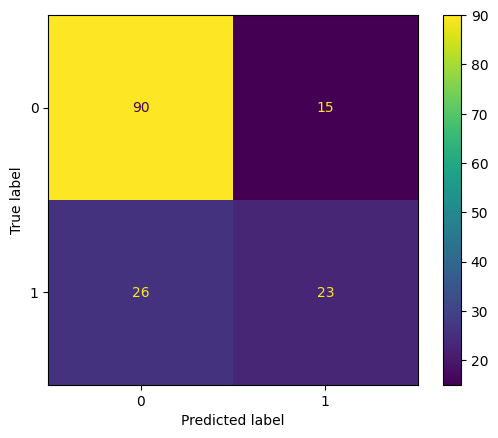

In [7]:
# Using LinearSVC model on all features.

from sklearn.svm import LinearSVC
use_model(LinearSVC);

In [8]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Accuracy Score: 68.18%


C:\Users\Raju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


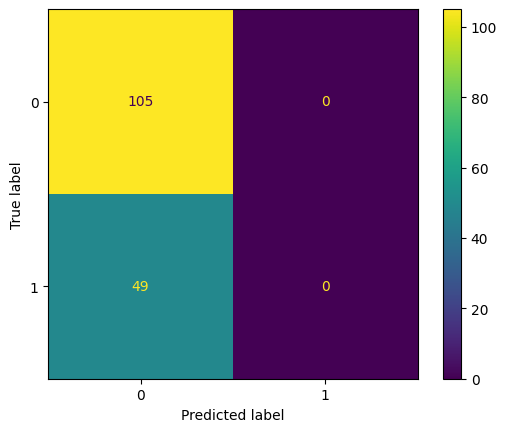

In [20]:
# Testing with single feature only.
use_single_feature(LinearSVC, "Glucose");

Accuracy Score: 77.27%


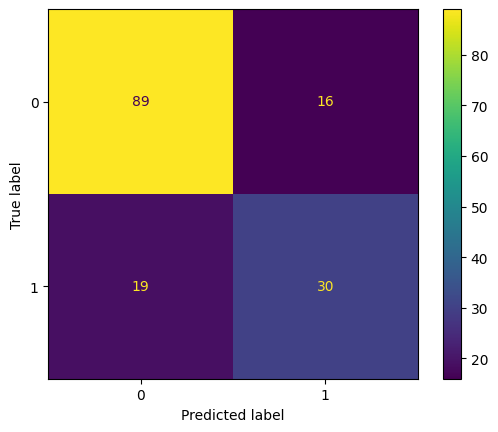

In [21]:
# Using RandomForestClassifier model on all features.
from sklearn.ensemble import RandomForestClassifier
use_model(RandomForestClassifier);

Accuracy Score: 74.68%


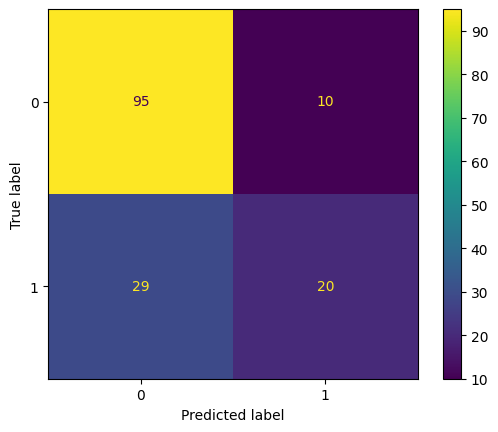

In [22]:
# Using single feature.
use_single_feature(RandomForestClassifier, "Glucose");

### Comparing multiple models using loop.

In [34]:
# Evaluation on multiple models using loop

def use_multiple_model(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models. Returns accuracy score of each given models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores.
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [80]:
# Importing different models.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

np.random.seed(88)
# Prepare data
X = df_diabetes.iloc[:, :-1]
y = df_diabetes['Outcome']

# Data split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#Defining models as dictionary.
models = {"Linear Regression": LinearRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC(),
          "Decision Tree": DecisionTreeClassifier(),
          "LinearSVC": LinearSVC()}

model_scores = use_multiple_model(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\Raju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Linear Regression': 0.34677368681801013,
 'KNN': 0.7337662337662337,
 'Random Forest': 0.8051948051948052,
 'SVC': 0.7792207792207793,
 'Decision Tree': 0.7207792207792207,
 'LinearSVC': 0.7077922077922078}

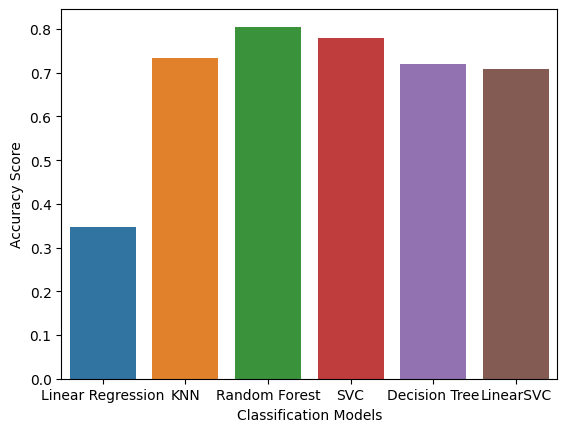

In [81]:
sns.barplot(y= pd.Series(model_scores.values()), x = pd.Series(model_scores.keys()))
plt.xlabel("Classification Models")
plt.ylabel("Accuracy Score");

### From above accuracy score comparision we can consider Random forest model as a best option for our dataset.

# End of Project-1

In [76]:
# Plot creation on classification report.
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report dictionary to a DataFrame for easy plotting
df_report = pd.DataFrame(report).T

df_report

,precision,recall,f1-score,support
0,0.837838,0.853211,0.845455,109.000000
1,0.627907,0.600000,0.613636,45.000000
accuracy,0.779221,0.779221,0.779221,0.779221
macro avg,0.732872,0.726606,0.729545,154.000000
weighted avg,0.776494,0.779221,0.777715,154.000000


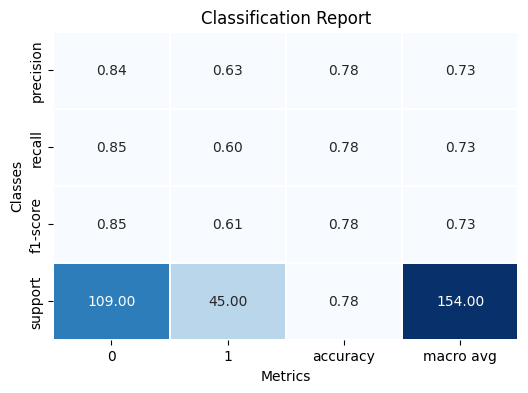

In [83]:
# Plot the classification report
plt.figure(figsize=(6, 4))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", cbar=False, fmt=".2f", linewidths=0.2)
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.title("Classification Report")
plt.show()

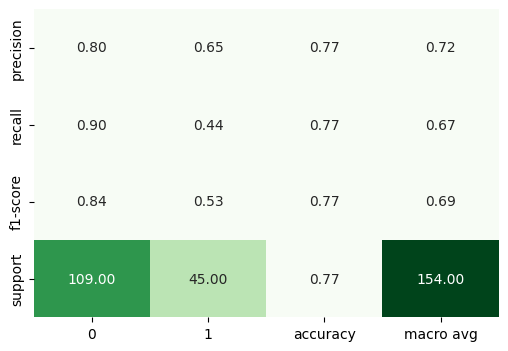

In [105]:
plt.figure(figsize = (6, 4))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Greens", fmt=".2f", cbar=False);